In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Online Payments Fraud Detection Dataset**
Açıklama: Bu veri seti, online ödemelerde dolandırıcılığı tespit etmeye yönelik bir veri setidir. Kategorik ve sayısal değişkenleri içerir.
* 
Kategorik Değişkenler: isFraud, TransactionType, TransactionDate, MerchantCategoryCode
Sayısal Değişkenler: TransactionAmount, MerchantID, UserID

**Veri Setini Yükleme ve Genel Bilgiler******

In [26]:

file_path = '/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv'
data = pd.read_csv(file_path)


In [27]:
# Veri setindeki toplam satır sayısını kontrol edelim.
total_rows = data.shape[0]
print(f"Toplam veri sayısı: {total_rows}")

# En az 10.000 veri noktası seçmek için örnekleme yapalım.
if total_rows > 10000:
    sampled_data = data.sample(n=10000, random_state=1)  # Rastgele 10.000 satır seç
else:
    sampled_data = data  # Veri seti zaten 10.000'den küçükse tamamını kullan

# Örneklenen veri setini kontrol edin
print(f"Örneklenen veri sayısı: {sampled_data.shape[0]}")

Toplam veri sayısı: 6362620
Örneklenen veri sayısı: 10000


In [28]:
sample_data.head

<bound method NDFrame.head of          step  type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
6322570   688     0   23557.12   C867750533        8059.00        31616.12   
3621196   274     3    6236.13   C601099070           0.00            0.00   
1226256   133     3   33981.87   C279540931       18745.72            0.00   
2803274   225     1  263006.42    C11675531       20072.00            0.00   
3201247   249     1  152013.74   C530649214       20765.00            0.00   
...       ...   ...        ...          ...            ...             ...   
2948862   230     3   55471.43  C1168979071      170934.16       115462.73   
2478393   204     1  275323.79   C844906259           0.00            0.00   
4305032   307     4  709026.19  C1388371696           0.00            0.00   
873865     42     3    4997.52   C609963293           0.00            0.00   
2241770   186     1   73617.20   C976552709        5724.00            0.00   

            nameDest  oldbalanceD

In [29]:
print(sample_data.info())
print(sample_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 6322570 to 2241770
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  int64  
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.5+ KB
None
              step          type        amount  oldbalanceOrg  newbalanceOrig  \
count  10000.00000  10000.000000  1.000000e+04   1.000000e+04    1.000000e+04   
mean     243.16310      1.701400  1.786672e+05   8.215130e+05    8.41736

**Veri Ön İşleme**

Series([], dtype: int64)


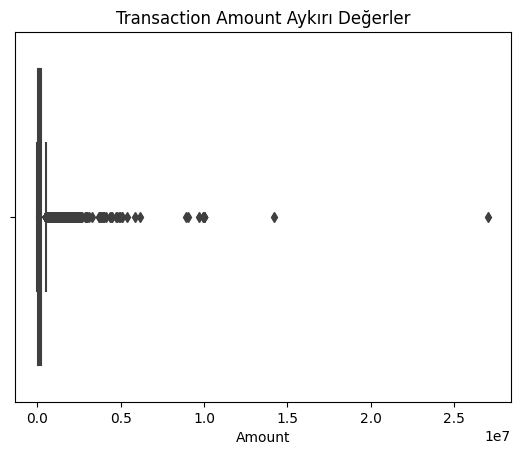

In [30]:
# Eksik veriler
missing_data = sample_data.isnull().sum()
print(missing_data[missing_data > 0])

# Aykırı değerleri görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

# 'amount' sütunundaki aykırı değerleri görselleştirelim
sns.boxplot(x=sample_data['amount'])
plt.title('Transaction Amount Aykırı Değerler')
plt.xlabel('Amount')
plt.show()

In [34]:
# Eksik verileri kontrol edelim
missing_data = sample_data.isnull().sum()
print(missing_data[missing_data > 0])


Series([], dtype: int64)


**Kategorik Değişkenlerin Kodlanması**

In [36]:
from sklearn.preprocessing import LabelEncoder

# 'type' ve 'isFraud' sütunlarını label encoding ile dönüştürelim
label_encoder = LabelEncoder()

sample_data['type'] = label_encoder.fit_transform(sample_data['type'])
sample_data['isFraud'] = label_encoder.fit_transform(sample_data['isFraud'])


In [37]:
# Kategorik değişkenleri one-hot encoding ile dönüştürelim
sample_data_encoded = pd.get_dummies(sample_data, columns=['type'])
print(sample_data_encoded.head())


         step     amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
6322570   688   23557.12  C867750533        8059.00        31616.12   
3621196   274    6236.13  C601099070           0.00            0.00   
1226256   133   33981.87  C279540931       18745.72            0.00   
2803274   225  263006.42   C11675531       20072.00            0.00   
3201247   249  152013.74  C530649214       20765.00            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
6322570  C1026934669       169508.66       145951.53        0               0   
3621196   M701283411            0.00            0.00        0               0   
1226256   M577905776            0.00            0.00        0               0   
2803274   C529577791       390253.56       653259.98        0               0   
3201247  C1304175579       252719.19       404732.93        0               0   

         type_0  type_1  type_2  type_3  type_4  
6322570    True   False   False   Fa

 **Eğitim ve Test Kümesine Bölme*******

In [38]:
from sklearn.model_selection import train_test_split

# Özellikler ve hedef değişkenleri oluşturalım.
X = sample_data_encoded.drop('isFraud', axis=1)  # Özellikler
y = sample_data_encoded['isFraud']  # Hedef değişken

# Eğitim ve test kümelerine bölme işlemini yapalım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Algoritma Seçimi & Hiperparametre Optimizasyonu**

**Lojistik Regresyon modeli**

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Kategorik ve sayısal sütunları tanımlayalım
categorical_features = ['nameOrig', 'nameDest']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Kategorik veriler için OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Verilerimizi dönüştürelim
X_preprocessed = preprocessor.fit_transform(X_train)

# Modelimizi eğitelim
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_preprocessed, y_train)


LogisticRegression(max_iter=1000)

In [40]:
# Ön işleme uygulanmış test verileri
X_test_preprocessed = preprocessor.transform(X_test)

# Test verileri ile tahmin yapalım
y_pred_log_reg = log_reg.predict(X_test_preprocessed)

# Performansı değerlendirelim
from sklearn.metrics import classification_report
print("Lojistik Regresyon Performansı:")
print(classification_report(y_test, y_pred_log_reg))

Lojistik Regresyon Performansı:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      0.80      0.89         5

    accuracy                           1.00      2000
   macro avg       1.00      0.90      0.94      2000
weighted avg       1.00      1.00      1.00      2000



In [46]:
# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Karışıklık Matrisi:")
print(conf_matrix)

# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Doğruluk: {accuracy:.2f}")

Karışıklık Matrisi:
[[1995    0]
 [   1    4]]
Doğruluk: 1.00


**DBSCAN modeli**

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
X = sample_data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Veriyi standart hale getirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# DBSCAN modelini oluşturma
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Modeli eğitme
dbscan.fit(X_scaled)

# Küme etiketlerini alma
labels = dbscan.labels_

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN modelini eğitelim
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(X_preprocessed)  # X_preprocessed, veri ön işleme sonrası veri

# Küme etiketlerini al
labels = dbscan_model.labels_

# Küme sayısını kontrol et
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Küme Sayısı: {n_clusters}")

# Silhouette Skorunu hesapla
if n_clusters > 1:  # Silhouette skoru sadece birden fazla küme varsa hesaplanabilir
    silhouette_avg = silhouette_score(X_preprocessed, labels)
    print(f"Silhouette Skoru: {silhouette_avg:.2f}")
else:
    print("Küme sayısı 1'den az olduğu için Silhouette Skoru hesaplanamıyor.")


Küme Sayısı: 0
Küme sayısı 1'den az olduğu için Silhouette Skoru hesaplanamıyor.


**KMeans modeli**

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Küme sayısını belirle (örneğin, 3 küme)
n_clusters = 3

# K-Means modelini oluşturma ve eğitme
kmeans_model = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
kmeans_model.fit(X_preprocessed)  # X_preprocessed, veri ön işleme sonrası veri

# Küme etiketlerini al
labels = kmeans_model.labels_

# Küme sayısını kontrol et
print(f"Küme Sayısı: {n_clusters}")

# Silhouette Skorunu hesapla
silhouette_avg = silhouette_score(X_preprocessed, labels)
print(f"Silhouette Skoru: {silhouette_avg:.2f}")

# Küme merkezlerini görüntüle
print("Küme Merkezleri:")
print(kmeans_model.cluster_centers_)


Küme Sayısı: 3
Silhouette Skoru: 0.81
Küme Merkezleri:
[[1.77839017e+05 2.51393524e+05 2.63786955e+05 ... 1.32327643e-04
  1.32327643e-04 1.32327643e-04]
 [2.70454089e+07 1.96209710e+05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.61720080e+05 1.08650860e+07 1.10224192e+07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
